## Data Analysis: Trying to see if there's a relation between Google stock price and real-state price in Santa Clara,CA

## Stock prices

The following code creates a Series object <i>stock</i> with the Google stock closing prices.

In [106]:
import pandas as pd
import pandas_datareader.data as web # if this line gives you an error, install pandas_datareader
import datetime    
ticker = 'googl'

start = datetime.datetime(2004, 7, 31)
end = datetime.datetime(2017, 4, 17)
df = web.DataReader(ticker, 'google', start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
df['dates'] = dates

# Create a Series called stock
stock = df.Close
stock.name = ticker
stock.head(10) #printing out top 10 to see if data is extracted correctly

Date
2004-08-19    50.22
2004-08-20    54.21
2004-08-23    54.75
2004-08-24    52.49
2004-08-25    53.05
2004-08-26    54.01
2004-08-27    53.13
2004-08-30    51.06
2004-08-31    51.24
2004-09-01    50.18
Name: googl, dtype: float64

Populating the interactive namespace from numpy and matplotlib


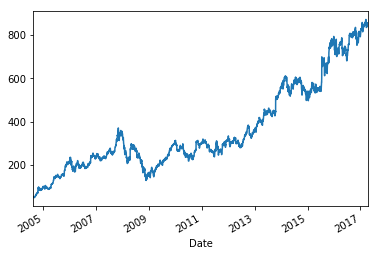

In [107]:
%pylab inline
stock.plot()

## Median prices of single family homes in zip code 95050

The file <i>santaclara_sfh.csv</i> was downloaded from <a href= 'http://redfin.com'>redfin.com</a>. For each end of month day, this file reports the median price of a single family home (sfh) in zip code 95050 over the previous 3 months.

In [108]:
# don't worry about understanding this code
df = pd.read_csv('santaclara_sfh.csv')
df['date'] = pd.to_datetime(df.date) # make the date column of type datetime
df['median_sfh_price_past_3_months'] = df.median_sfh_price_past_3_months + 0.0 # make the price column of type float
df.set_index('date',inplace=True) # make date the index 
housing = df['median_sfh_price_past_3_months'] # take the series of median prices
housing.name = 'housing'

In [109]:
housing.head()

date
2012-01-31    520000.0
2012-02-29    545000.0
2012-03-31    545500.0
2012-04-30    527000.0
2012-05-31    550000.0
Name: housing, dtype: float64

Populating the interactive namespace from numpy and matplotlib


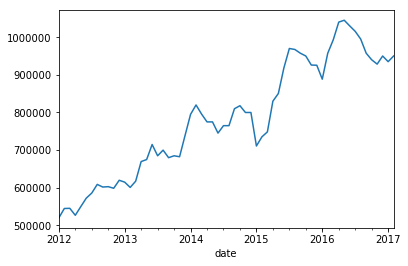

In [110]:
%pylab inline
housing.plot()

## Are housing prices correlated to stock prices?

To anwer this question, let's align the two Series. The Series <i>housing</i> has one observation for each ending day of each month and a value that is the 3-month moving median; the series <i>stock</i> has one entry for each <b>trading day</b> and the value that is the closing price. 

<p>Performing following steps
<ol>
<li>Padding <i>stock</i> so that there are no missing days (currently, holidays are missing) = fill the holes in the series 
<li>Compute the 3-month moving average of <i>stock</i>
<li>Retain only the end-of-month days in <i>stock</i>
</ol>
</p>


#### Step #1: Pad stock so that there are no missing days (currently, holidays are missing)

In [100]:
padded = stock.asfreq('1D',method = 'ffill')

#### Step #2: Compute the 90-day moving average of stock

In [101]:
movavg = padded.rolling(90).mean()

#### Step #3: Retain the same days as in the housing Series

In [102]:
mod_stock = movavg[housing.index]

### Compute correlation

Normalize and put them in the same chart

In [97]:
norm_housing = housing / housing[0]

In [98]:
norm_stock = mod_stock / mod_stock[0]

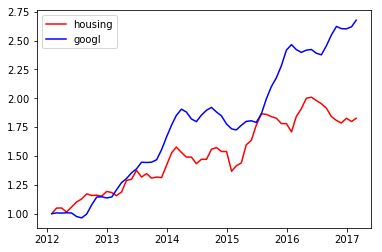

In [99]:
import matplotlib.pyplot as plt

plt.plot(norm_housing,'r') # r for "red" 
plt.plot(norm_stock,'b')  # b for "blue"
plt.legend(loc=2)
plt.show()